In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset
df=pd.read_csv(r"C:\Users\jeezychild\Desktop\data\sample_sales_data.csv")
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Data cleaning 

In [6]:
#checking for nulls
df.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [8]:
#checking for duplicates 
df.duplicated().sum()

0

In [10]:
df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [11]:
df.shape

(7829, 10)

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Exploratory Data Analysis 

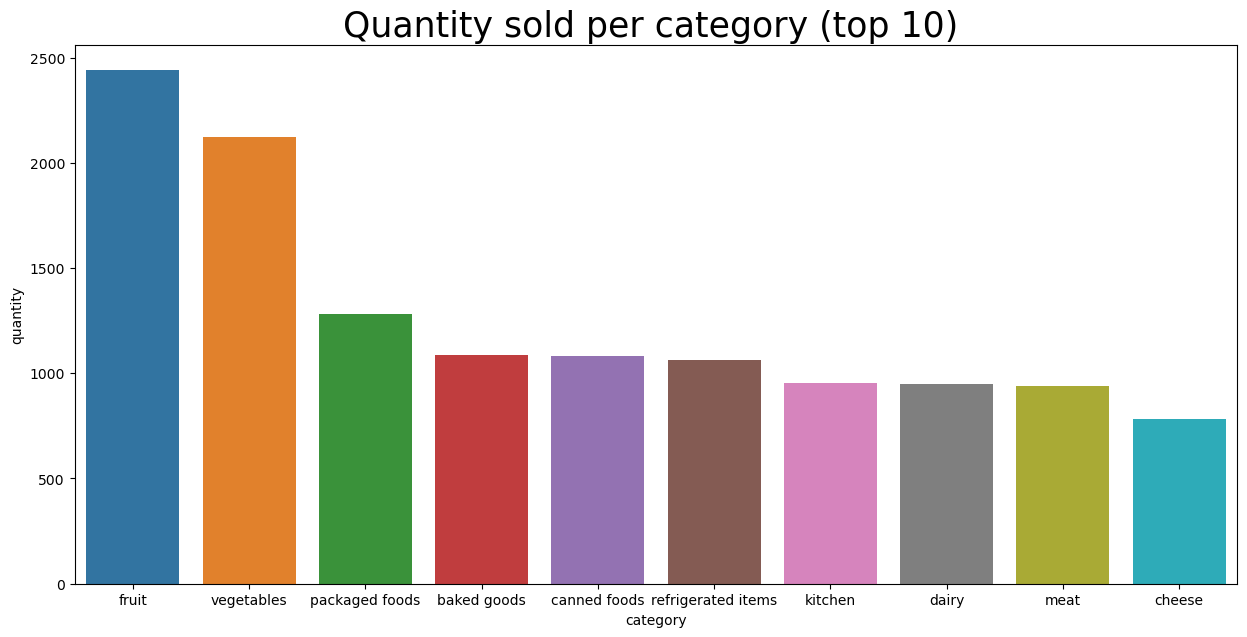

In [39]:
a=df.groupby('category')['quantity'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(15,7))
sns.barplot(data=a, y='quantity', x='category')
plt.title('Quantity sold per category (top 10) ', fontsize=25)
plt.show()

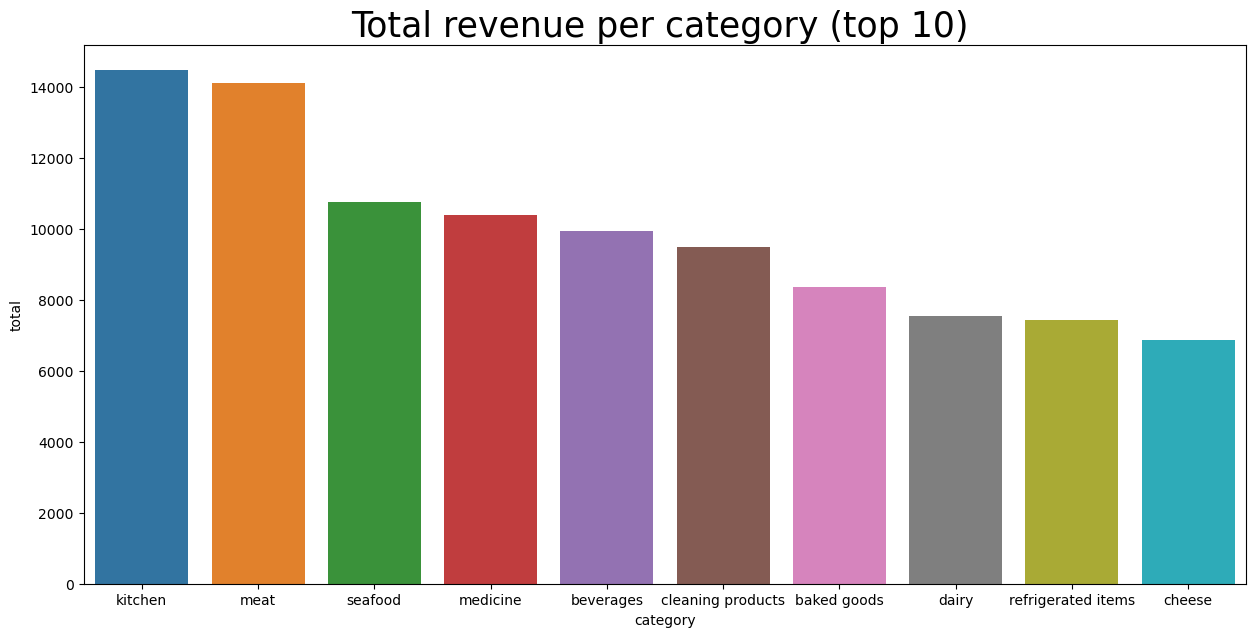

In [43]:
b=df.groupby('category')['total'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(15,7))
sns.barplot(data=b, x='category', y='total')
plt.title('Total revenue per category (top 10) ', fontsize=25)
plt.show()

<Figure size 1500x700 with 0 Axes>

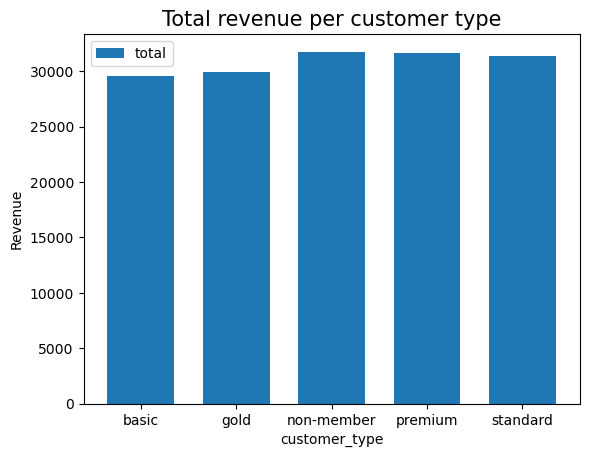

In [55]:
c=df.groupby('customer_type')['total'].sum().reset_index()
plt.figure(figsize=(15,7))
c.plot(kind='bar', x='customer_type', y='total', width=0.7)
plt.title('Total revenue per customer type', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Revenue')
plt.show()

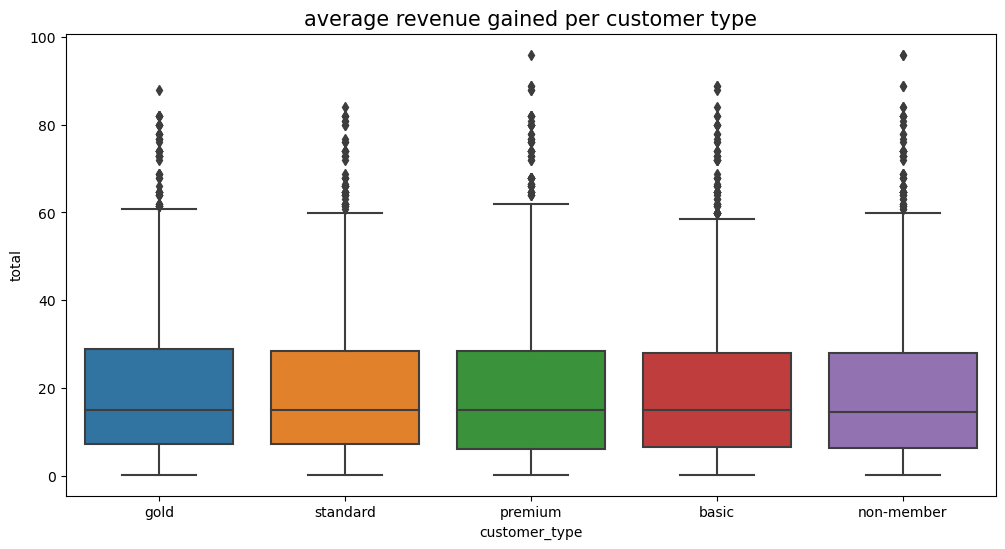

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='customer_type', y='total')
plt.title('average revenue gained per customer type', fontsize=15)
plt.show()

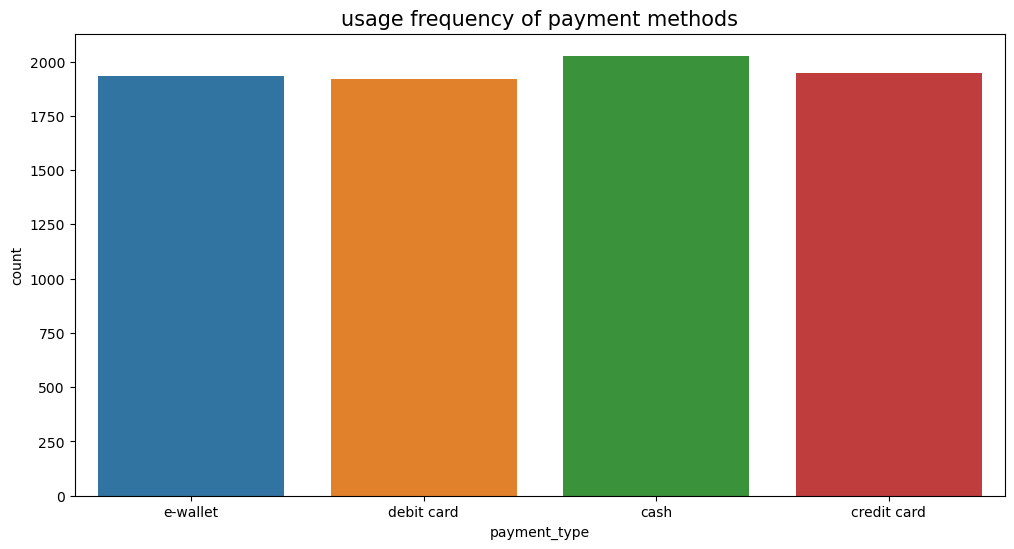

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='payment_type')
plt.title('usage frequency of payment methods', fontsize=15)
plt.show()

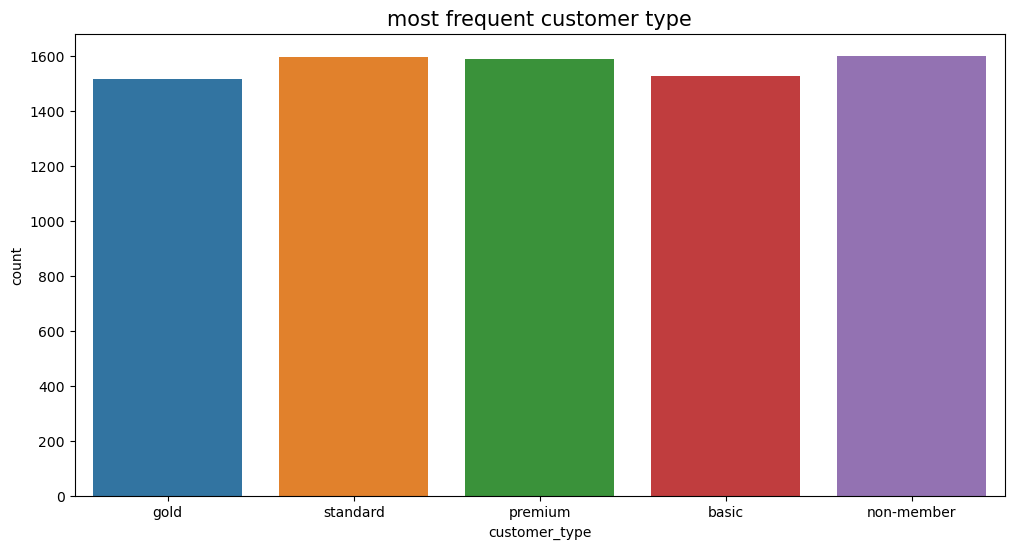

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='customer_type')
plt.title('most frequent customer type', fontsize=15)
plt.show()

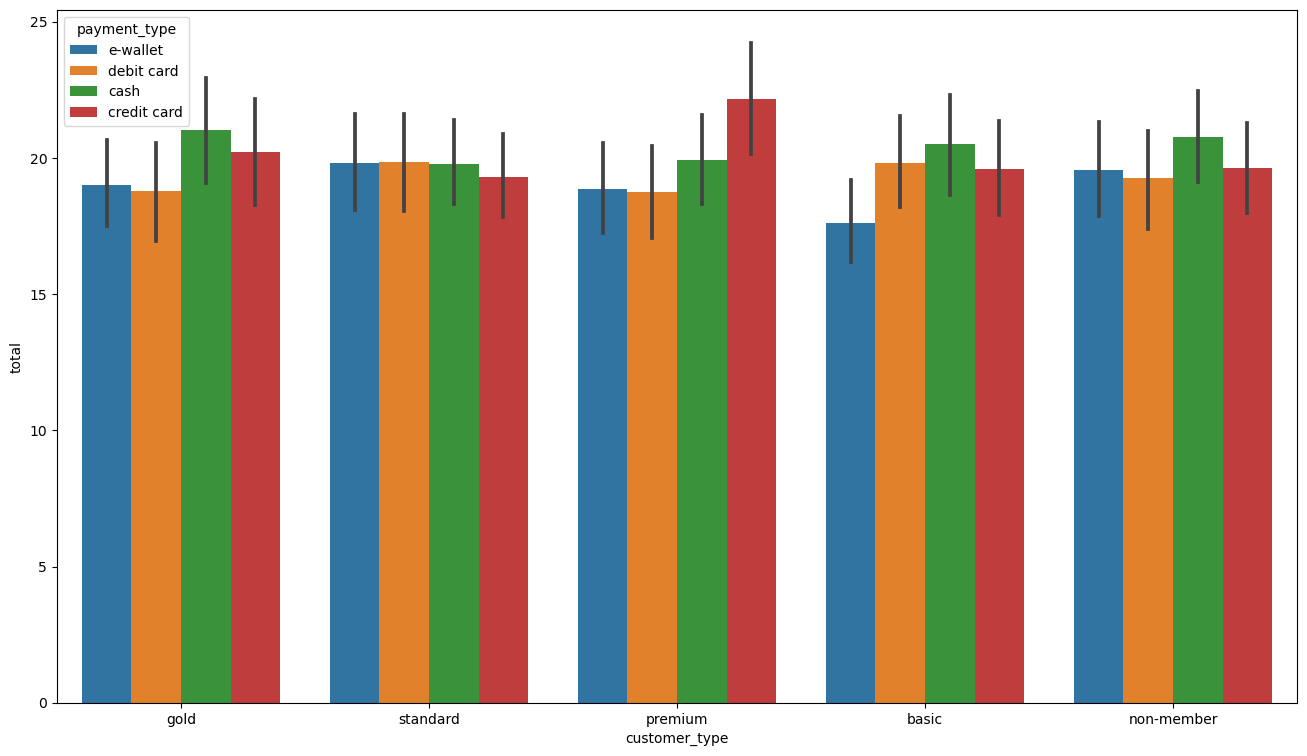

In [71]:
plt.figure(figsize=(16,9))
sns.barplot(data=df, x='customer_type', y='total', hue='payment_type')
plt.show()

In [72]:
c

,customer_type,total
0,basic,29569.16
1,gold,29939.99
2,non-member,31755.24
3,premium,31655.68
4,standard,31388.78
